In [7]:
import numpy as np
from  Functions import *
from mpl_toolkits import mplot3d
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams["figure.figsize"] = 12.8, 9.6

In [8]:
#There are many possibe ways to generate random float. In this solution numpy.random.uniform was used 
#Functions names:
#['sphere', 'ackley', 'rastrigin', 'rosenbrock', 'griewank', 'schwefel', 'levy', 'micha','zakhar']

In [9]:
#generate a plot with function and with optimal points 
def make_plt(func_name, x1_opt, x2_opt, z_opt):
    func = func_dic[func_name][0]    #choose function
    low_lim = func_dic[func_name][1][0]  #find limits
    high_lim = func_dic[func_name][1][1]

    x1 = np.linspace(low_lim, high_lim, 100) #generate coordinates for ploting func
    x2 = np.linspace(low_lim, high_lim, 100)

    xx1, xx2 = np.meshgrid(x1, x2, sparse=True) #grid of coordinates, result - shape1 = (1, 100), shape2 = (100, 1)
    z = np.empty([xx1.shape[1], xx2.shape[0]]) #empty matrix (100, 100)

    for i in range(xx2.shape[0]): #filling z matrix using preprepared functins. ?????? can be better solution
        for j in range(xx1.shape[1]):
            z[i, j] = func([xx1[:, j][0] , xx2[i][0]])

    ax = plt.axes(projection='3d') #create 3D template
    ax.scatter3D(x1_opt, x2_opt, z_opt, color = "red") #plotting optimal points
    ax.plot_wireframe(xx1, xx2, z, cmap='jet') #plotting function
    

In [15]:
def blind_search(func_name, dimension, n_iter, seed = 123):
    np.random.seed(seed)     #for reproducibility
    func = func_dic[func_name][0]    #choose function
    low_lim = func_dic[func_name][1][0]  #find limits
    high_lim = func_dic[func_name][1][1]
    
    x_rnd = np.random.uniform(low_lim, high_lim, dimension) #generate initial random vector of x
    best_value = func(x_rnd) #iniciate best value
    
    all_best_x = [list(x_rnd)]
    all_best_value = [best_value]
    
    for i in range(n_iter):  #make a loop for a number of iterations
        x_rnd = np.random.uniform(low_lim, high_lim, dimension) #generate random vector x
        temp_value = func(x_rnd) #calculate function value at x
        if temp_value < best_value: #compere calculated value with best one
            best_value = temp_value #save new best value and best vector x
            best_x = x_rnd
            all_best_x.append(list(x_rnd)) #save all best values for x anf f(x)
            all_best_value.append(best_value)
    
    x1_opt = [all_best_x[i][0] for i in range(len(all_best_x))]
    x2_opt = [all_best_x[i][1] for i in range(len(all_best_x))]
    z_opt = all_best_value
    make_plt(func_name, x1_opt, x2_opt, z_opt)
    
    return [best_value, best_x]

[2.983632622605697, array([0.44103202, 0.08470731])]

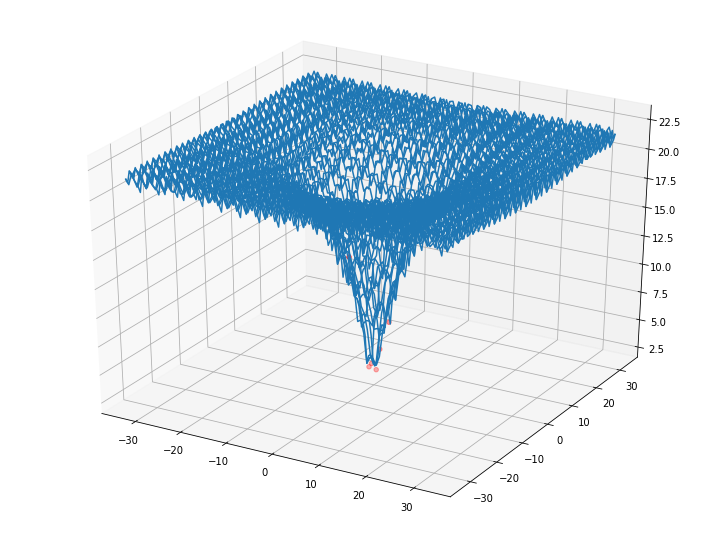

In [16]:
blind_search('ackley', 2, 10000)
